In [361]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

colnames=['Year', 'Country']
df = pd.read_csv("attacks.csv",encoding = "ISO-8859-1") #To load the data csv
campeonas = pd.read_csv("campeonas.csv", names=colnames, header=None,encoding = "ISO-8859-1")
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [371]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [372]:
df.shape

(25723, 24)

In [373]:
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
7622,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
pd.isna(df).sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [376]:
b

0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
            ...     
25718            NaN
25719            NaN
25720            NaN
25721            NaN
25722            NaN
Name: Activity, Length: 25723, dtype: object

In [377]:
df["Area"]

0             California
1                Georgia
2                 Hawaii
3        New South Wales
4                 Colima
              ...       
25718                NaN
25719                NaN
25720                NaN
25721                NaN
25722                NaN
Name: Area, Length: 25723, dtype: object

In [378]:
df[["Activity","Area"]].head()

,Activity,Area
0,Paddling,California
1,Standing,Georgia
2,Surfing,Hawaii
3,Surfing,New South Wales
4,Free diving,Colima


In [379]:
df.Activity.unique()

array(['Paddling', 'Standing', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [380]:
df.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [381]:
dfsinna = df.dropna(axis=0,how="all")
display(dfsinna)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
surf_usa = df[(df.Country=="USA")&(df.Activity == "Surfing" )]
surf_usa.shape

(564, 24)

In [383]:
surf_usa.count()

Case Number               564
Date                      564
Year                      564
Type                      564
Country                   564
Area                      564
Location                  560
Activity                  564
Name                      557
Sex                       545
Age                       476
Injury                    560
Fatal (Y/N)               538
Time                      454
Species                   332
Investigator or Source    562
pdf                       564
href formula              564
href                      564
Case Number.1             564
Case Number.2             564
original order            564
Unnamed: 22                 1
Unnamed: 23                 0
dtype: int64

In [384]:
surf_usa.drop(["Unnamed: 22","Unnamed: 23"],axis=1,inplace = True)
display(surf_usa)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
53,2017.12.31,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,...,N,18h00,Tiger shark,"J. Howard, Surfling Now, 1/2/2018",2017.12.31-Mariano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.31,2017.12.31,6250.0
54,2017.12.30,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,...,N,12h00,NaN,R. Collier,2017.12.30.Jones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.30,2017.12.30,6249.0
61,2017.11.18,18-Nov-2017,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,...,N,Late afternoon,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6242.0
74,2017.10.09,09-Oct-2017,2017.0,Unprovoked,USA,Hawaii,"Davidsons Beach, Kekaha, Kauai",Surfing,Mitch Milan,M,...,N,18h30,"Tiger shark, 8 to 10 feet","Hawaii News Now, 10/10/2017",2017.10.09-Milan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.09,2017.10.09,6229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,1965.00.00.f,1965,1965.0,Provoked,USA,California,"Dana Point, San Clemente, Orange County",Surfing,Barry Berg,M,...,N,NaN,NaN,"Orange County Register, 1/28/2998",1965.00.00.f-Berg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.00.00.f,1965.00.00.f,2660.0
4284,1955.08.30.a,30-Aug-1955,1955.0,Provoked,USA,California,"Zuma Beach, Santa Monica, Los Angeles County",Surfing,Dale Strand,M,...,N,NaN,5' thresher or blue shark. The shark was kill...,"SAF Case #244; D. Miller & R. Collier, V.M. Co...",1955.08.30.a-DaleStrand.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.08.30.a,1955.08.30.a,2019.0
6097,1828.00.00,1828,1828.0,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,...,Y,NaN,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",1828.00.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1828.00.00,1828.00.00,206.0
6143,1779.00.00,1779,1779.0,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,...,Y,NaN,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0


In [385]:
surf_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 2 to 6201
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             564 non-null    object 
 1   Date                    564 non-null    object 
 2   Year                    564 non-null    float64
 3   Type                    564 non-null    object 
 4   Country                 564 non-null    object 
 5   Area                    564 non-null    object 
 6   Location                560 non-null    object 
 7   Activity                564 non-null    object 
 8   Name                    557 non-null    object 
 9   Sex                     545 non-null    object 
 10  Age                     476 non-null    object 
 11  Injury                  560 non-null    object 
 12  Fatal (Y/N)             538 non-null    object 
 13  Time                    454 non-null    object 
 14  Species                 332 non-null    o

array(['Invalid', 'Unprovoked', 'Provoked'], dtype=object)

In [386]:
surf_usa.loc[surf_usa["Type"] == "Unprovoked"].sample(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2580,1991.10.05,05-Oct-1991,1991.0,Unprovoked,USA,California,"Horseshoe Reef, Scott Creek, Davenport, Santa ...",Surfing,John Ferrerira,M,...,N,07h30,5 m to 6 m [16.5' to 20'] white shark,"R. Collier, pp.126-128 ; Orlando Sentinel, 10/...",1991.10.05-Ferreira_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.10.05,1991.10.05,3723.0
2085,1999.12.02,02-Dec-1999,1999.0,Unprovoked,USA,Florida,"Boynton Beach, Palm Beach County",Surfing,male,M,...,N,12h30,NaN,"The Palm Beach Post,12/3/1999",1999.12.02-BoyntonBeach-surfer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.12.02,1999.12.02,4218.0
354,2015.09.29,29-Sep-2015,2015.0,Unprovoked,USA,Florida,"Vilano Beach, St. Johns County",Surfing,"David Morrison, Jr.",M,...,N,16h20,"Blacktip shark, 5' to 6'","First Coast News, 9/30/2015",2015.09.29-Morrison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.09.29,2015.09.29,5949.0
2616,1990.10.30.a,30-Oct-1990,1990.0,Unprovoked,USA,Florida,"Indialantic, Brevard County",Surfing,Mark Evans,M,...,N,15h30,NaN,"S. Jacobson, Orlando Sentinel, 11/1/1990",1990.10.30.a-Mark Evans.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.10.30.a,1990.10.30.a,3687.0
3102,1979.03.24,24-Mar-1979,1979.0,Unprovoked,USA,Florida,"Singer Island, Riviera Beach, Palm Beach County",Surfing,Donald A. Stewart,M,...,N,11h30,Blacktip or spinner shark,"M. Vorenberg, GSAF",1979.03.24-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.03.24,1979.03.24,3201.0
1691,2004.03.16,16-Mar-2004,2004.0,Unprovoked,USA,Hawaii,"Kalihiwai Beach, Kauai",Surfing,Bruce Orth,M,...,N,07h45,"Tiger shark, 2.4 m to 3 m [8' to 10']",The Hawaii Channel,2004.03.16-Orth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.03.16,2004.03.16,4612.0
2340,1995.09.19.,19-Sep-1995,1995.0,Unprovoked,USA,Florida,"Matanzas Bay Inlet, St. Johns County",Surfing,Gavin Korth,M,...,N,NaN,1.8 m [6'] shark,"Orlando Sentinel, 9/20/1995, p.C.3",1995.09.19-Korth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.09.19.,1995.09.19.,3963.0
1919,2001.08.19.b,19-Aug-2001,2001.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Becky Chapman,F,...,N,13h06,NaN,"E. Ritter & S. Petersohn, GSAF; Orlando Sentin...",2001.08.19.b-Chapman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.08.19.b,2001.08.19.b,4384.0
725,2012.11.04.a,04-Nov-2012,2012.0,Unprovoked,USA,Hawaii,"Davidson's Surf Break, Kekaha, Kaua'i",Surfing,male,M,...,N,08h10,"Tiger shark, 8'",Kaua'i Police Department,2012.11.04.a-Kekaha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.11.04.a,2012.11.04.a,5578.0
1286,2008.03.07,07-Mar-2008,2008.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Thomas Larkin,M,...,N,08h00,White shark,R. Collier,2008.03.07-Larkin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.03.07,2008.03.07,5017.0


In [387]:
surf_usa["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1965., 1955.,
       1828., 1779.,    0.])

In [388]:
surf_usa.loc[surf_usa["Year"] == 0].sample(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6201,ND-0122,Beforer 1994,0.0,Unprovoked,USA,Florida,"Lost Tree Village, Palm Beach County",Surfing,C.M,M,...,N,NaN,NaN,"M. Vorenberg, GSAF",ND-0122-CM.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0122,ND-0122,102.0


<AxesSubplot:xlabel='Year', ylabel='Count'>

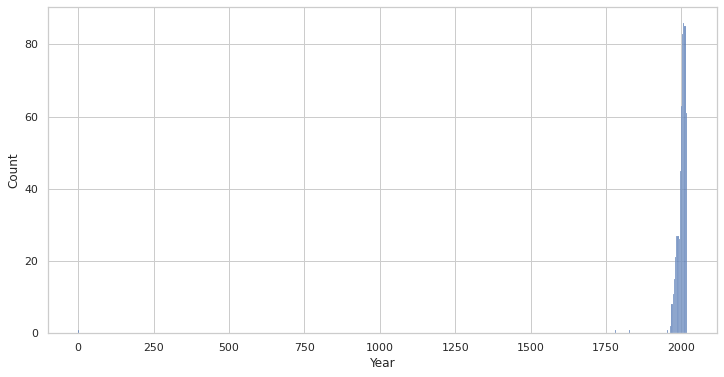

In [389]:
sns.histplot(x=surf_usa.Year)

In [390]:
surf_usa.drop([6201],axis=0,inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [391]:
surf_usa["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1965., 1955.,
       1828., 1779.])

<AxesSubplot:xlabel='Year', ylabel='Count'>

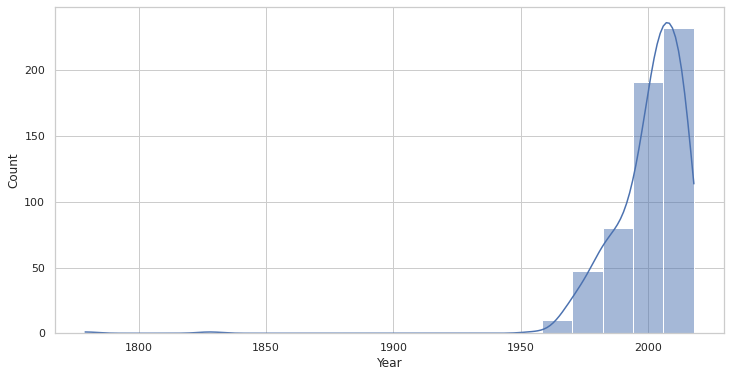

In [392]:
sns.histplot(x=surf_usa.Year,bins=20,kde=True)

In [393]:
surf_usa.loc[surf_usa["Year"] == 1828].sample(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6097,1828.00.00,1828,1828.0,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,...,Y,NaN,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",1828.00.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1828.00.00,1828.00.00,206.0


In [394]:
surf_usa.drop([6097],axis=0,inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [395]:
surf_usa.loc[surf_usa["Year"] == 1779].sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6143,1779.00.00,1779,1779.0,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,...,Y,NaN,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0


In [396]:
surf_usa.drop([6143],axis=0,inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [397]:
surf_usa["Year"].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992.,
       1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1965., 1955.])

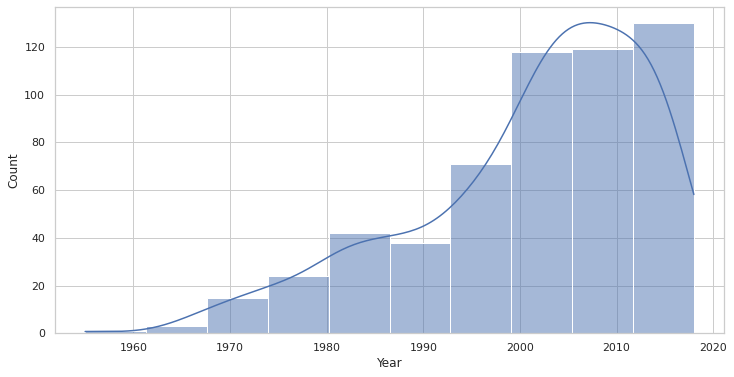

In [398]:
hist_usa = sns.histplot(x=surf_usa.Year,bins=10,kde=True)

<AxesSubplot:xlabel='Type', ylabel='Year'>

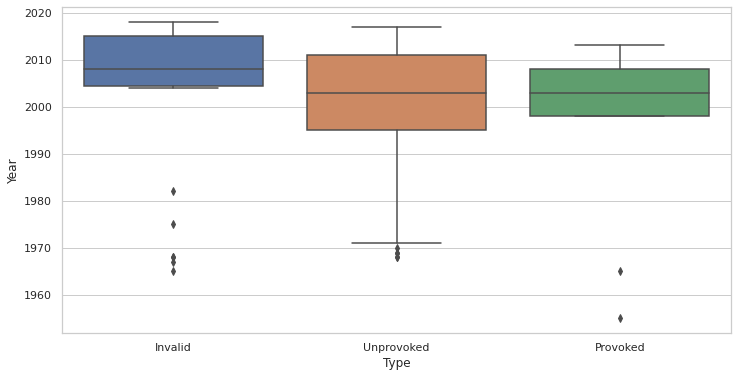

In [399]:
sns.boxplot(data = surf_usa,y="Year",x="Type")

<AxesSubplot:xlabel='Year', ylabel='Count'>

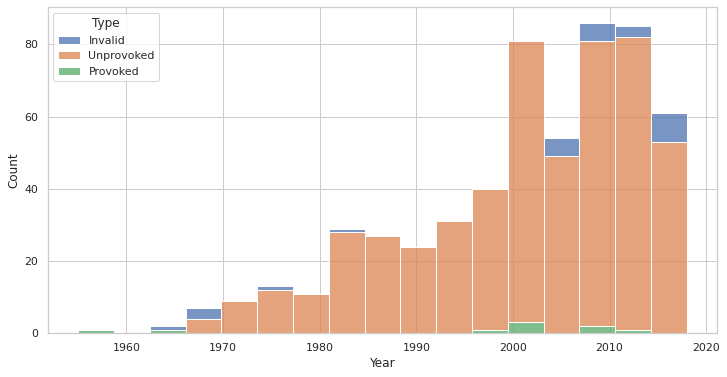

In [400]:
sns.histplot(data = surf_usa,x="Year",hue = "Type",multiple="stack")

In [401]:
surf_usa["Fatal (Y/N)"].unique()

array(['N', nan, 'Y', 'UNKNOWN'], dtype=object)

In [402]:
surf_usa.loc[surf_usa["Fatal (Y/N)"] == "UNKNOWN"].sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2943,1983.04.19,19-Apr-1983,1983.0,Unprovoked,USA,Florida,NaN,Surfing,Arnold Schwarzwood,M,...,UNKNOWN,NaN,NaN,"M. Vorenberg, GSAF",1983.04.19-NV-Schwarzwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.04.19,1983.04.19,3360.0
2648,1990.00.00,1990,1990.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,...,UNKNOWN,NaN,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,3655.0
3006,1981.10.17,17-Oct-1981,1981.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Surfing,Robert Conklin,M,...,UNKNOWN,09h45,NaN,"M. Vorenberg, GSAF",1981.10.17-NV-Conklin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1981.10.17,1981.10.17,3297.0


In [403]:
surf_usa.loc[surf_usa["Fatal (Y/N)"] == nan]

NameError: name 'nan' is not defined

In [414]:
surf_usa["Fatal"].isna().sum()

26

In [415]:
surf_usa.shape

(561, 22)

In [418]:
surf_usa['Fatal'].fillna('U')

2       N
53      N
54      N
61      N
74      N
       ..
3491    U
3523    U
3629    U
3643    N
4284    N
Name: Fatal, Length: 561, dtype: object

In [407]:
surf_usa.rename(columns={"Fatal (Y/N)":"Fatal"},inplace=True)
surf_usa["Fatal"].unique()

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


array(['N', nan, 'Y', 'UNKNOWN'], dtype=object)

In [419]:
surf_usa.loc[surf_usa["Fatal"] == "U"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


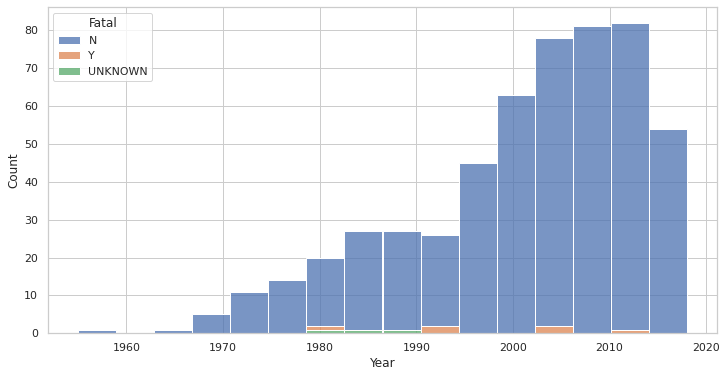

In [420]:
hist_stack_usa = sns.histplot(data = surf_usa,x="Year",hue = "Fatal",multiple="stack")

### Paso a revisar el número de surfistas que hay en otros países

In [421]:
df.loc[df["Activity"] == "Surfing"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,...,NaN,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.12,2018.05.12,6288.0,NaN,NaN
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,...,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0,NaN,NaN
19,2018.04.28.a,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,...,NaN,"B. Myatt, GSAF",2018.04.28.a-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.a,2018.04.28.a,6284.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,1922.01.04,04-Jan-1922,1922.0,Unprovoked,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",Surfing,John Manning Rowe,M,...,NaN,"The Argus, 1/9/1922; V.M. Coppleson (1933), N15",1922.01.04-JManningRowe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1922.01.04,1922.01.04,1068.0,NaN,NaN
5280,1918.03.22,22-Mar-1918,1918.0,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Arthur Cook,M,...,12' shark,"The Advertiser, 3/25/1918",1918.03.22-Cook.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1918.03.22,1918.03.22,1023.0,NaN,NaN
6097,1828.00.00,1828,1828.0,Unprovoked,USA,Hawaii,"Uo, Lahaina, Maui",Surfing,Male,M,...,NaN,"J. Borg, p.68; L. Taylor (1993), pp.94-95",1828.00.00-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1828.00.00,1828.00.00,206.0,NaN,NaN
6143,1779.00.00,1779,1779.0,Unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,M,...,NaN,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0,NaN,NaN


In [422]:
surf_aus = df[(df.Country=="AUSTRALIA")&(df.Activity == "Surfing" )]
surf_aus.shape


(195, 24)

In [423]:
surf_aus.count()

Case Number               195
Date                      195
Year                      195
Type                      194
Country                   195
Area                      195
Location                  194
Activity                  195
Name                      194
Sex                       193
Age                       143
Injury                    194
Fatal (Y/N)               188
Time                      152
Species                   131
Investigator or Source    193
pdf                       195
href formula              194
href                      195
Case Number.1             195
Case Number.2             195
original order            195
Unnamed: 22                 0
Unnamed: 23                 0
dtype: int64

In [424]:
surf_aus.drop(["Unnamed: 22","Unnamed: 23"],axis=1,inplace = True)
display(surf_aus)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,...,N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0
19,2018.04.28.a,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,...,N,16h50,NaN,"B. Myatt, GSAF",2018.04.28.a-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.a,2018.04.28.a,6284.0
20,2018.04.25.b,25-Apr-2018,2018.0,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,...,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,6283.0
21,2018.04.25.a,25-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,...,N,09h30,3 m shark,"B.Myatt, GSAF",2018.04.25.a-Bruce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.a,2018.04.25.a,6282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,1944.01.14,14-Jan-1944,1944.0,Unprovoked,AUSTRALIA,New South Wales,"First Beach, Forster",Surfing,Peter Weir,M,...,N,17h00,NaN,"G.P. Whitley (1951), p.193, cites Daily Mirror...",1944.01.14-Weir.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.01.14,1944.01.14,1646.0
4890,1936.01.05,05-Jan-1936,1936.0,Invalid,AUSTRALIA,Queensland,"Main Beach, Southport",Surfing,Kevin Canavan,M,...,NaN,NaN,Shark involvement prior to death was not confi...,"Canberra Times, 1/7/1936; V.M. Coppleson, p.92-93",1936.01.05-Canavan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.01.05,1936.01.05,1413.0
4917,1935.03.11,11-Mar-1935,1935.0,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Surfing,Eric McMichael,M,...,N,NaN,NaN,"Sydney Morning Herald, 3/11/1935",1935.03.11-McMichael.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1935.03.11,1935.03.11,1386.0
5235,1922.01.04,04-Jan-1922,1922.0,Unprovoked,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",Surfing,John Manning Rowe,M,...,Y,Evening,NaN,"The Argus, 1/9/1922; V.M. Coppleson (1933), N15",1922.01.04-JManningRowe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1922.01.04,1922.01.04,1068.0


In [425]:
surf_aus.shape

(195, 22)

In [426]:
surf_aus["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'UNKNOWN'], dtype=object)

In [427]:
surf_aus.rename(columns={"Fatal (Y/N)":"Fatal"},inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [429]:
surf_aus['Fatal'] = surf_aus['Fatal'].fillna('U')
surf_aus['Fatal'] = surf_aus['Fatal'].str.replace('UNKNOWN', 'U')

<ipython-input-429-ae72b4437eb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_aus['Fatal'] = surf_aus['Fatal'].fillna('U')
<ipython-input-429-ae72b4437eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_aus['Fatal'] = surf_aus['Fatal'].str.replace('UNKNOWN', 'U')


In [430]:
surf_aus["Fatal"].unique()

array(['N', 'Y', 'U'], dtype=object)

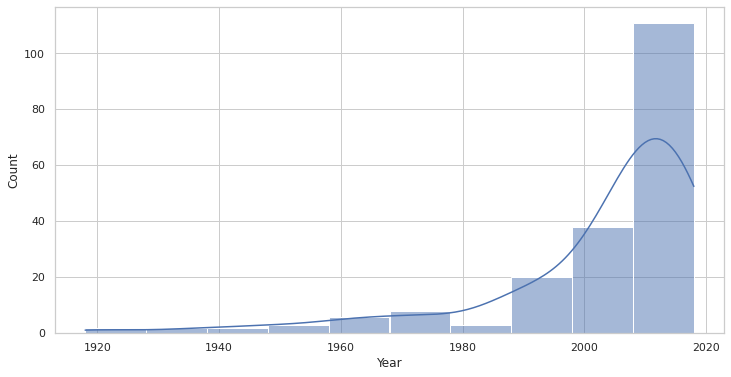

In [431]:
hist_aus = sns.histplot(x=surf_aus.Year,bins=10,kde=True)

<AxesSubplot:xlabel='Year', ylabel='Count'>

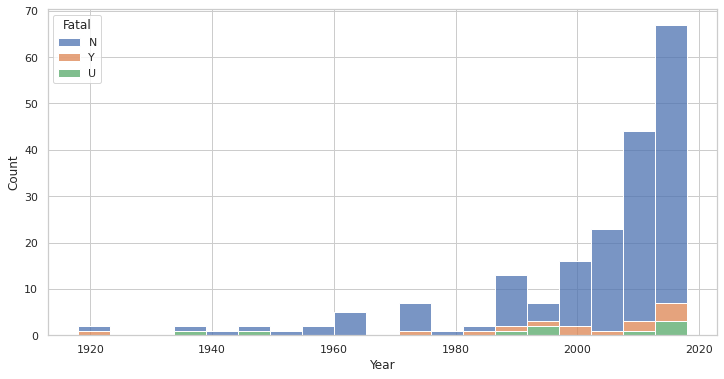

In [432]:
sns.histplot(data = surf_aus,x="Year",hue = "Fatal",multiple="stack")

In [433]:
duplis_usa = surf_usa.pivot_table(columns=['Fatal'], aggfunc='size')
print (duplis_usa)

Fatal
N          526
UNKNOWN      3
Y            6
dtype: int64


In [435]:
duplis_aus = surf_aus.pivot_table(columns=['Fatal'], aggfunc='size')
print (duplis_aus)

Fatal
N    172
U      9
Y     14
dtype: int64


In [436]:
display(campeonas)

,Years,Countries
0,2019,USA
1,2018,AUS
2,2017,AUS
3,2016,AUS
4,2015,USA
5,2014,AUS
6,2013,USA
7,2012,AUS
8,2011,USA
9,2010,AUS


In [364]:
campeonas[["Years","Countries"]] = campeonas["Year"].str.split(";",expand=True)
display(campeonas)

,Year,Country,Years,Countries
0,2019;USA,NaN,2019,USA
1,2018;AUS,NaN,2018,AUS
2,2017;AUS,NaN,2017,AUS
3,2016;AUS,NaN,2016,AUS
4,2015;USA,NaN,2015,USA
5,2014;AUS,NaN,2014,AUS
6,2013;USA,NaN,2013,USA
7,2012;AUS,NaN,2012,AUS
8,2011;USA,NaN,2011,USA
9,2010;AUS,NaN,2010,AUS


In [365]:
campeonas.drop(["Year","Country"],axis=1,inplace = True)
display(campeonas)

,Years,Countries
0,2019,USA
1,2018,AUS
2,2017,AUS
3,2016,AUS
4,2015,USA
5,2014,AUS
6,2013,USA
7,2012,AUS
8,2011,USA
9,2010,AUS


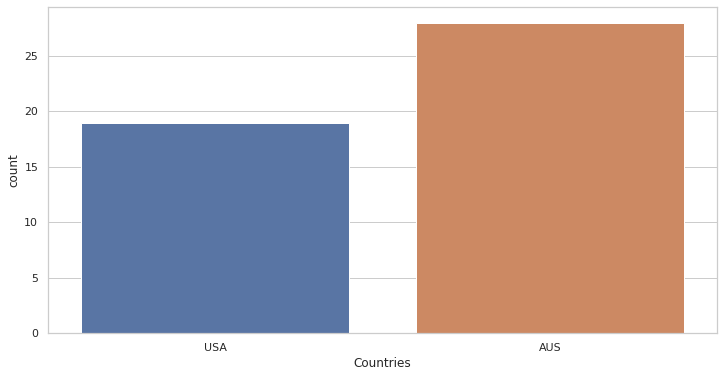

In [366]:
champ_count = sns.countplot(data = campeonas,x="Countries")

<AxesSubplot:xlabel='Year', ylabel='Count'>

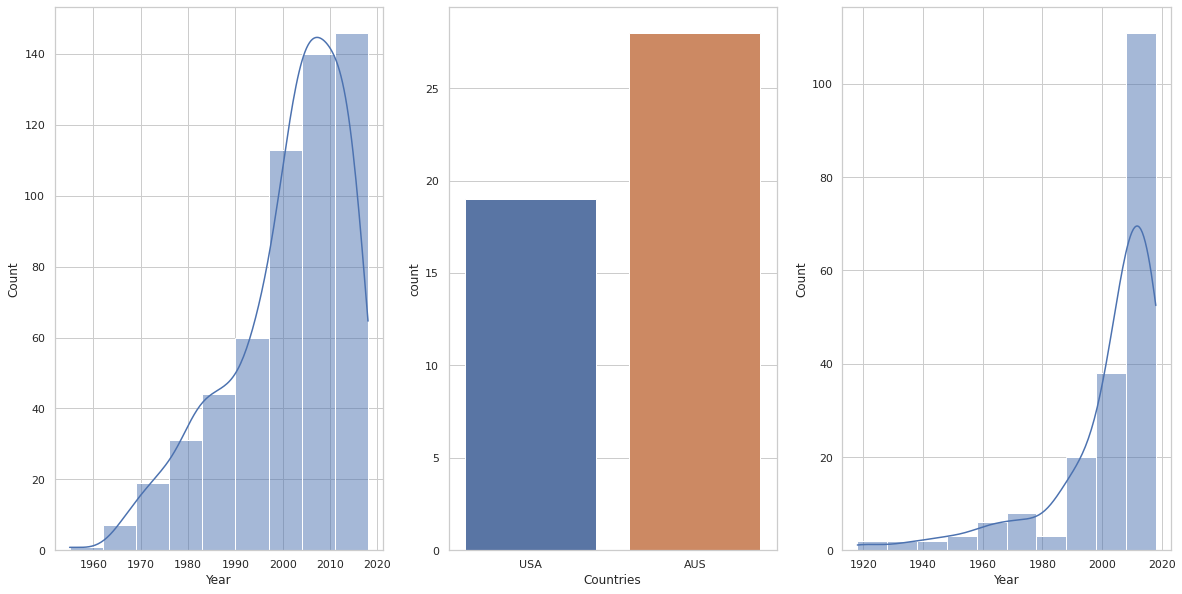

In [443]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.countplot(x=campeonas.Countries,ax=axs[1])
sns.histplot(data=surf_usa,x="Year",bins=9,kde=True,ax=axs[0])
sns.histplot(data=surf_aus,x="Year",bins=10,kde=True,ax=axs[2])

In [444]:
surf_usa.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
53,2017.12.31,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,...,N,18h00,Tiger shark,"J. Howard, Surfling Now, 1/2/2018",2017.12.31-Mariano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.31,2017.12.31,6250.0
54,2017.12.30,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,...,N,12h00,NaN,R. Collier,2017.12.30.Jones.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.30,2017.12.30,6249.0
61,2017.11.18,18-Nov-2017,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,...,N,Late afternoon,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6242.0
74,2017.10.09,09-Oct-2017,2017.0,Unprovoked,USA,Hawaii,"Davidsons Beach, Kekaha, Kauai",Surfing,Mitch Milan,M,...,N,18h30,"Tiger shark, 8 to 10 feet","Hawaii News Now, 10/10/2017",2017.10.09-Milan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.09,2017.10.09,6229.0


In [451]:
surf_usa["Sex "].unique()

array(['M', 'F', nan, 'lli'], dtype=object)

In [454]:
duplis_sex_usa = surf_usa.pivot_table(columns=['Sex '], aggfunc='size')
print (duplis_sex_usa)

Sex 
F       40
M      501
lli      1
dtype: int64


In [459]:
surf_usa["Sex "].isna().sum()

19

In [452]:
surf_aus["Sex "].unique()

array(['M', 'F', nan], dtype=object)

In [455]:
duplis_sex_aus = surf_aus.pivot_table(columns=['Sex '], aggfunc='size')
print (duplis_sex_aus)

Sex 
F     10
M    183
dtype: int64


In [457]:
surf_aus["Sex "].isna().sum()

2

In [460]:
surf_usa.rename(columns={"Sex ":"Sex"},inplace=True)
surf_aus.rename(columns={"Sex ":"Sex"},inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [461]:
surf_aus["Sex"].unique()

array(['M', 'F', nan], dtype=object)

In [466]:
surf_usa.loc[surf_usa["Sex"] == "lli"]
surf_usa.drop([1624],axis=0,inplace=True)

/home/luisserrano/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [469]:
surf_usa["Sex"].unique()

array(['M', 'F', nan], dtype=object)

In [472]:
surf_aus["Sex"].isna().sum()

2

In [473]:
surf_usa["Sex"].isna().sum()

19

In [478]:
surf_usa["Sex"].tail()

3491    NaN
3523      M
3629      M
3643      M
4284      M
Name: Sex, dtype: object

In [481]:
surf_usa.shape

(560, 22)

In [479]:
surf_usa_sinna = surf_usa[surf_usa['Sex'].notna()]
surf_usa_sinna.shape

(541, 22)

In [484]:
surf_aus.shape

(195, 22)

In [483]:
surf_aus_sinna = surf_aus[surf_aus['Sex'].notna()]
surf_aus_sinna.shape

(193, 22)

In [485]:
surf_usa_sinna["Sex"].unique()

array(['M', 'F'], dtype=object)

In [486]:
surf_aus_sinna["Sex"].unique()

array(['M', 'F'], dtype=object)

In [497]:
surf_aus_sinna.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
16,2018.05.09,09-May-2018,2018.0,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,...,N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,6287.0
19,2018.04.28.a,28-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,Gearys Beach,Surfing,Adam Murray,M,...,N,16h50,NaN,"B. Myatt, GSAF",2018.04.28.a-Murray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.a,2018.04.28.a,6284.0
20,2018.04.25.b,25-Apr-2018,2018.0,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,...,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,6283.0
21,2018.04.25.a,25-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,...,N,09h30,3 m shark,"B.Myatt, GSAF",2018.04.25.a-Bruce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.a,2018.04.25.a,6282.0


<AxesSubplot:xlabel='Year', ylabel='Sex'>

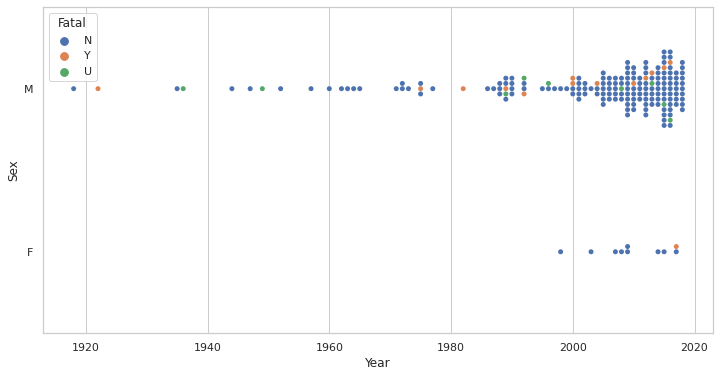

In [530]:
sns.swarmplot(data = surf_aus_sinna,x="Year",y="Sex",hue="Fatal")

<AxesSubplot:xlabel='Year', ylabel='Sex'>

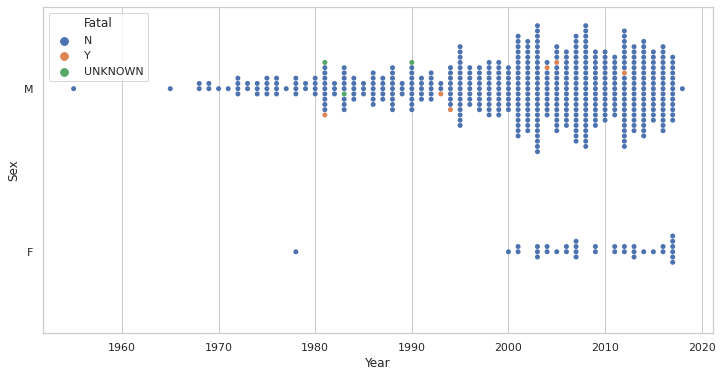

In [529]:
sns.swarmplot(data = surf_usa_sinna,x="Year",y="Sex",hue="Fatal")

<AxesSubplot:xlabel='Year', ylabel='Sex'>

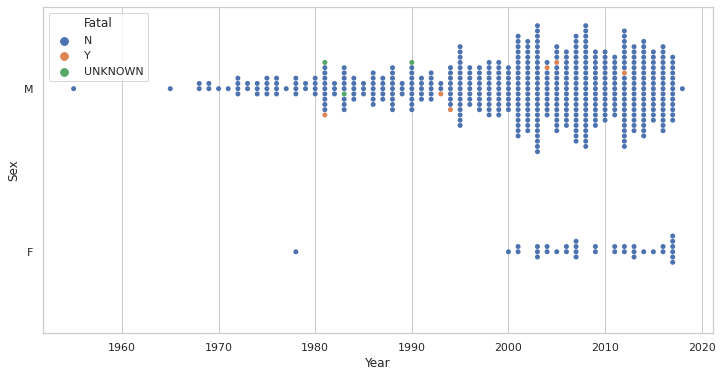

In [534]:
sns.swarmplot(data = surf_usa,x="Year",y="Sex",hue="Fatal")

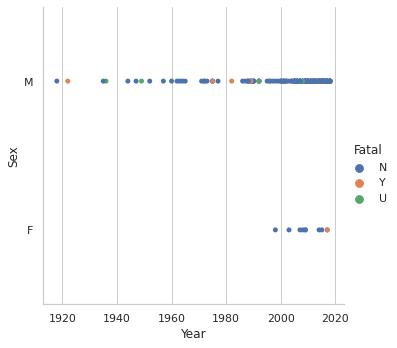

In [517]:
sns.catplot(data = surf_aus_sinna,x="Year",y="Sex",hue="Fatal",jitter=False)

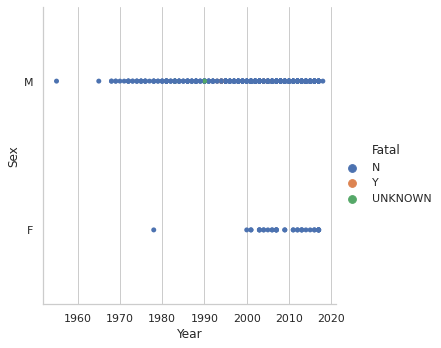

In [513]:
sns.catplot(data = surf_usa_sinna,x="Year",y="Sex",hue="Fatal",jitter=False)

<AxesSubplot:xlabel='Year', ylabel='Sex'>

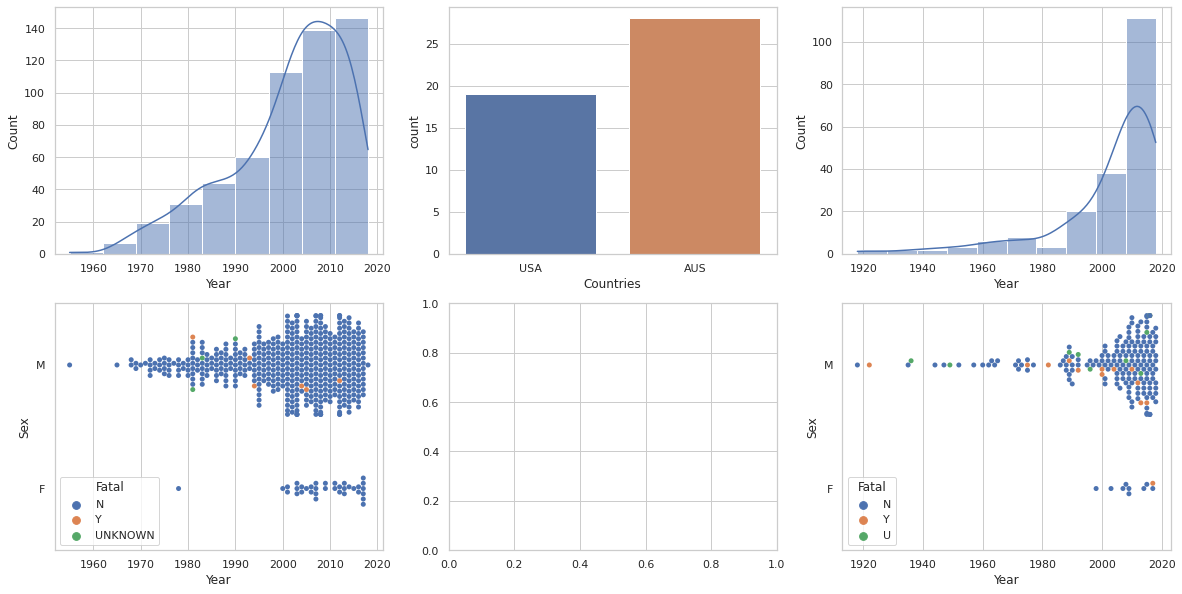

In [533]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.countplot(x=campeonas.Countries,ax=axs[0,1])
sns.histplot(data=surf_usa,x="Year",bins=9,kde=True,ax=axs[0,0])
sns.histplot(data=surf_aus,x="Year",bins=10,kde=True,ax=axs[0,2])
sns.swarmplot(data = surf_usa_sinna,x="Year",y="Sex",hue="Fatal",ax=axs[1,0])
sns.swarmplot(data = surf_aus_sinna,x="Year",y="Sex",hue="Fatal",ax=axs[1,2])